<a href="https://colab.research.google.com/github/R-it-a/Estrutura-de-dados/blob/main/enem2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install swifter
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv', 
    error_bad_lines=False, 
    sep = ";", 
    encoding = 'ISO-8859-1',
   usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q001", "Q002", "Q006", "Q025"]
) 

# Transforma a variável TP_SEXO em binária
educacao_2018 = pd.get_dummies(educacao_2018, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2018['TP_COR_RACA'] = educacao_2018['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2018 = educacao_2018.dropna()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-6-293d3e6fecaa>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv',


In [ ]:
educacao_2018['TP_COR_RACA'].head()


0          amarelo
1          amarelo
2    nao_declarado
3            pardo
4         indigena
Name: TP_COR_RACA, dtype: object

In [ ]:
educacao_2018['TP_COR_RACA'].value_counts()['branco']


1440815

In [ ]:
educacao_2018['TP_COR_RACA'].value_counts()['pardo']


1787696

In [ ]:
educacao_2018['TP_COR_RACA'].value_counts()['preto']


477383

In [ ]:
educacao_2018['TP_COR_RACA'].value_counts()['nao_declarado']


77971

In [ ]:
educacao_2018['TP_COR_RACA'].value_counts()['amarelo']


87504

In [ ]:
educacao_2018['TP_COR_RACA'].value_counts()['indigena']


22360

In [ ]:
# Dividir o dataframe em grupos com base na variável TP_SEXO e TP_COR_RACA
groups = educacao_2018.groupby(['TP_SEXO_F', 'TP_SEXO_M', 'TP_COR_RACA'])

# Calcular a média das notas de matemática para cada grupo
mean_scores = groups.mean()['NU_NOTA_MT']

# Definir o grupo de referência como "branco masculino"
reference_group = mean_scores.loc[(0, 1, 'branco')]

# Calcular a diferença entre as médias de cada grupo
score_diff = mean_scores - reference_group

# Calcular a variância dessa diferença
variance = score_diff.var()

# Calcular o desvio padrão dessa diferença
std_dev = np.sqrt(variance)

# Imprimir o resultado
print(f"A desigualdade entre as notas dos grupos raciais/gêneros, medida pela diferença entre as médias, é de {std_dev:.2f} pontos.")


A desigualdade entre as notas dos grupos raciais/gêneros, medida pela diferença entre as médias, é de 32.45 pontos.


In [ ]:
educacao_2018['TP_COR_RACA'].head()


0          amarelo
1          amarelo
2    nao_declarado
3            pardo
4         indigena
Name: TP_COR_RACA, dtype: object

In [ ]:
# Carrega os dados de 2018
educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv',
                            error_bad_lines=False,
                            sep=';',
                            encoding='ISO-8859-1',
                            usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA'])

# Transforma a variável TP_SEXO em binária
educacao_2018 = pd.get_dummies(educacao_2018, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2018['TP_COR_RACA'] = educacao_2018['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2018 = educacao_2018.dropna()

# Agrupa os dados por sexo e raça e calcula a mediana das notas de matemática
median_scores_2018 = educacao_2018.groupby(['TP_SEXO_F', 'TP_SEXO_M', 'TP_COR_RACA'])['NU_NOTA_MT'].median()

# Mostra as medianas para cada grupo
print(median_scores_2018)




<ipython-input-26-f1fc98bdb105>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv',


TP_SEXO_F  TP_SEXO_M  TP_COR_RACA  
0          1          amarelo          553.20
                      branco           580.00
                      indigena         496.95
                      nao_declarado    556.50
                      pardo            528.00
                      preto            516.40
1          0          amarelo          503.10
                      branco           525.90
                      indigena         470.90
                      nao_declarado    513.00
                      pardo            488.90
                      preto            482.90
Name: NU_NOTA_MT, dtype: float64


IndexError: ignored

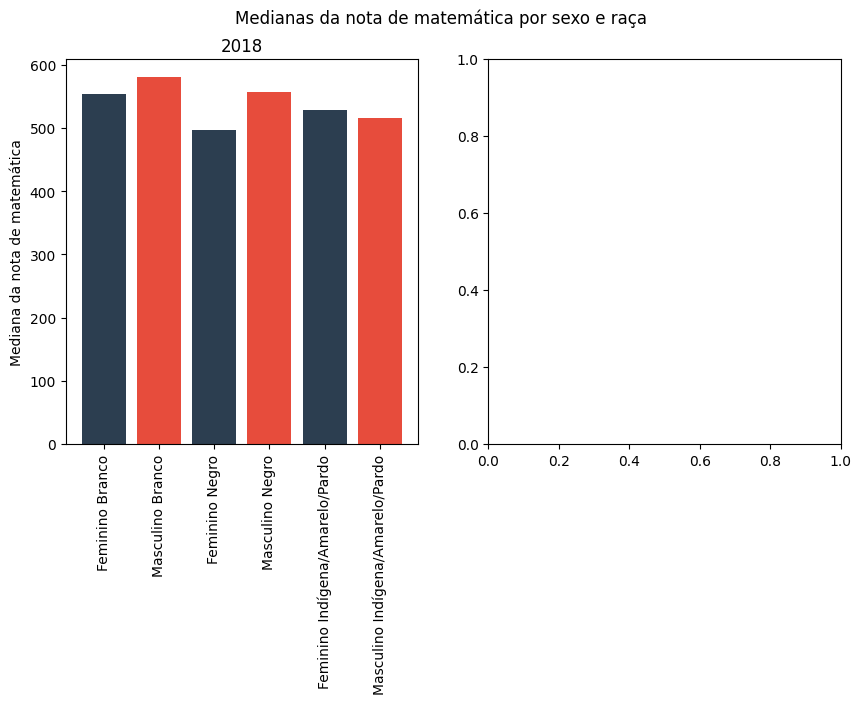

In [ ]:
import matplotlib.pyplot as plt

# Cria uma lista com as medianas de cada grupo 2018
median_scores = [median_scores_2018.values]

# Define o nome dos grupos e das medianas
groups = ['Feminino Branco', 'Masculino Branco', 'Feminino Negro', 'Masculino Negro', 'Feminino Indígena/Amarelo/Pardo', 'Masculino Indígena/Amarelo/Pardo']
labels = ['2018']

# Cria uma figura com dois subplots (um para cada ano)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Define o título da figura
fig.suptitle('Medianas da nota de matemática por sexo e raça')

# Cria um loop para cada subplot (ano)
for i, ax in enumerate(axs):
    # Define os dados e as cores para as barras
    data = median_scores[i]
    colors = ['#2C3E50', '#E74C3C']
    
    # Cria um loop para cada grupo e plota a barra correspondente
    for j, group in enumerate(groups):
        ax.bar(j, data[j], color=colors[j%2], label=group)
    
    # Define o título e os rótulos do eixo x
    ax.set_title(labels[i])
    ax.set_xticks(range(len(groups)))
    ax.set_xticklabels(groups, rotation=90)
    
    # Define o rótulo do eixo y
    ax.set_ylabel('Mediana da nota de matemática')
    
    # Adiciona a legenda
  # ax.legend()
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

# Exibe o gráfico
plt.show()


IndexError: ignored

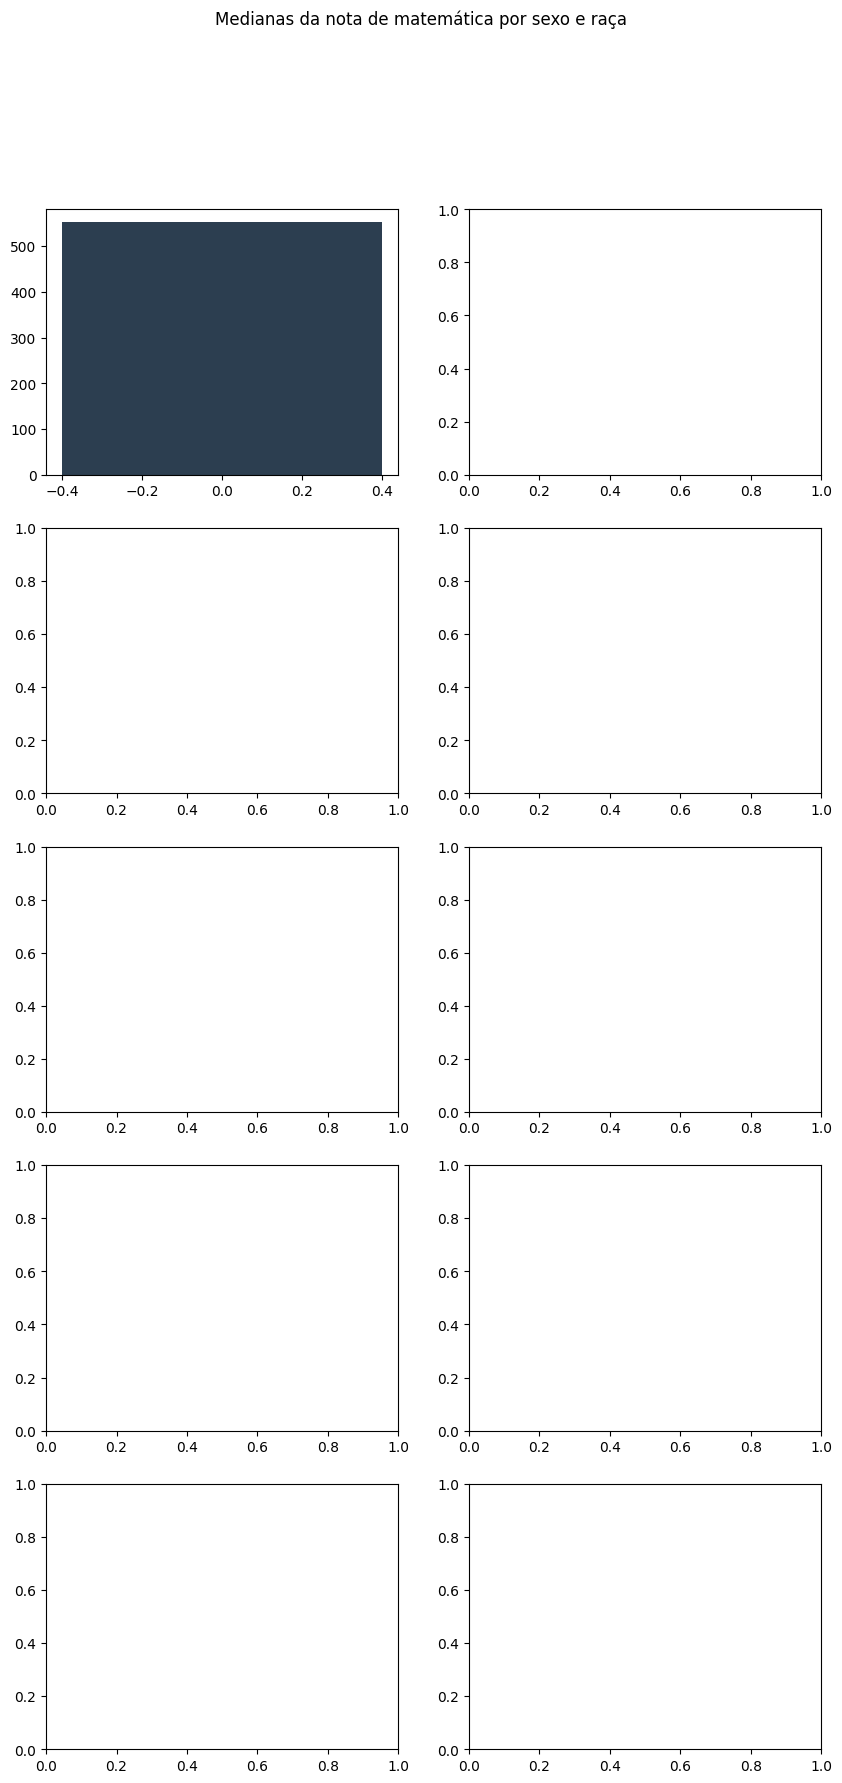

In [ ]:
import matplotlib.pyplot as plt

# Cria uma lista com as medianas de cada grupo 2018
median_scores = [median_scores_2018.values]

# Define o nome dos grupos e das medianas
groups = ['Feminino Branco', 'Masculino Branco', 'Feminino Negro', 'Masculino Negro', 'Feminino Indígena', 'Masculino Indígena', 'Feminino Amarelo', 'Masculino Amarelo', 'Feminino Pardo', 'Masculino Pardo']
labels = ['2018']

# Cria uma figura com cinco subplots (um para cada grupo)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

# Define o título da figura
fig.suptitle('Medianas da nota de matemática por sexo e raça')

# Cria um loop para cada subplot (grupo e ano)
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Define os dados e as cores para as barras
        data = median_scores[j][i*2:(i+1)*2]
        colors = ['#2C3E50', '#E74C3C']
        
        # Cria um loop para cada grupo e plota a barra correspondente
        for k in range(2):
            ax.bar(k, data[k], color=colors[k%2], label=labels[k])
        
        # Define o título e os rótulos do eixo x
        ax.set_title(groups[i*2+j])
        ax.set_xticks(range(2))
        ax.set_xticklabels(labels)
        
        # Define o rótulo do eixo y
        ax.set_ylabel('Mediana da nota de matemática')
        
        # Adiciona a legenda
        ax.legend()
        
plt.subplots_adjust(hspace=0.5)

# Exibe o gráfico
plt.show()
